In [445]:
using Plots

In [446]:
function golden_section(f, a, b, eps=0.01)
    Fi = (1+5^0.5)/2
    while true
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2
        end
    end
end
function norm(a)
    su = 0 
    for i ∈ a
        su += i^2
    end
    return su^(1/2)
end
function dfdx(f, x,y, h)
    return (f(x+h,y)-f(x-h,y))/(2*h)
end
function dfdy(f, x,y, h)
    return (f(x,y+h)-f(x,y-h))/(2*h)
end

dfdy (generic function with 1 method)

In [447]:
function grad_d(f,start,alpha, eps, h)
    x_i = copy(start)
    hist = [copy(start)]
    while true
        grad = [dfdx(f, x_i..., h), dfdy(f, x_i..., h)]
        x_i1 = x_i-alpha*grad
        x_i = x_i1
        push!(hist, copy(x_i))
        if norm([dfdx(f, x_i..., h), dfdy(f, x_i..., h)]) < eps
            return x_i, hist
        end
    end
end

grad_d (generic function with 1 method)

In [448]:
function multi_param(f, start, eps, h)
    
    x = copy(start)
    hist = []
    pred_x = x
    first = true
    while true
        push!(hist, copy(x))
        grad = [dfdx(f, x..., h), dfdy(f, x..., h)]
        if norm(grad) < eps
            return x, hist
        end
        if first
            a = golden_section(a -> f((x-a*grad)...), 0, 1)
            pred_x = copy(x)
            x = x-a*grad
            first = false
        else
            dx = (x-pred_x)
            a, _ = grad_d((a1, a2) -> f((x-a1*grad+a2*dx)...), [0.1,0.1], 0.0001, 0.1, 0.01)
            pred_x = copy(x)
            x = x - a[1]*grad+a[2]*dx
        end
    end
end

multi_param (generic function with 1 method)

In [449]:
f(x, y) = (x^2+y^2)
banan(x, y) = 1*(x^2-y)^2+1*(x-1)^2+0

rastrigin(x, y) = 10 * 2 + x^2 - 10 * cos(2π * x) + y^2 - 10 * cos(2π * y)

schwefel(x, y) = 418.9829 * 2 - (x * sin(sqrt(abs(x))) + y * sin(sqrt(abs(y))))

xs1 = -10:1:10
ys1 = -10:1:10
xs2 = 410:1:430
ys2 = 410:1:430

410:1:430

6


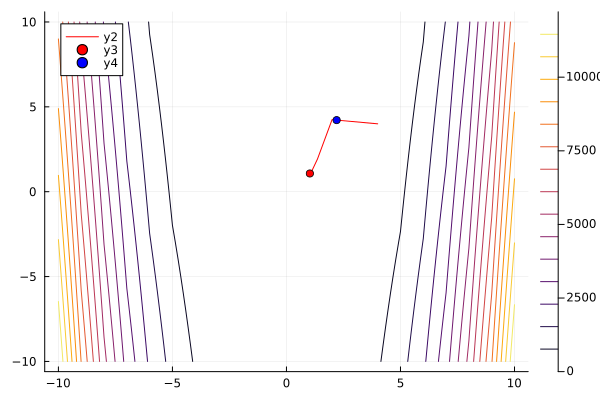

In [450]:
x_min, hist = multi_param(banan, [4., 4.], 0.1, 0.01)
println(length(hist))
contour(xs1, ys1, banan)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
scatter!([hist[2][1]], [hist[2][2]], color=:blue)

3


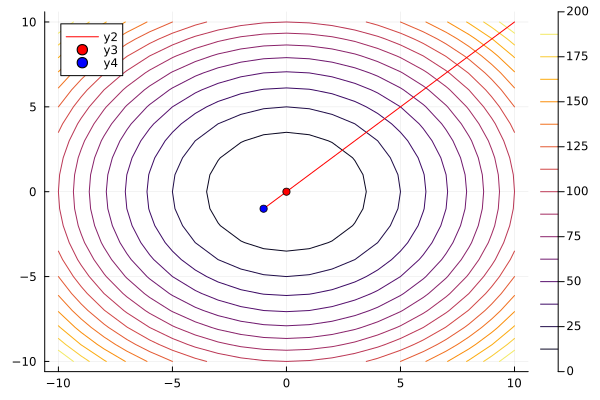

In [451]:
x_min, hist = multi_param(rastrigin, [10., 10.], 0.1, 0.01)
println(length(hist))
contour(xs1, ys1, rastrigin)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
scatter!([hist[2][1]], [hist[2][2]], color=:blue)

3


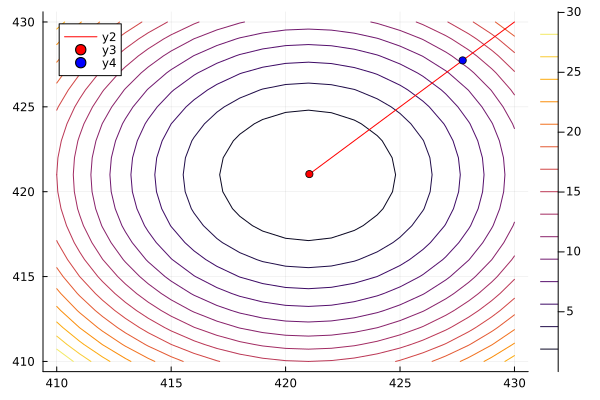

In [452]:
x_min, hist = multi_param(schwefel, [430., 430.], 0.1, 0.01)
println(length(hist))
contour(xs2, ys2, schwefel)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
scatter!([hist[2][1]], [hist[2][2]], color=:blue)